To identify genes specifically expressed in lactating mammary glands, the gene expression profiles of luminal and basal cells from different developmental stages were compared.


GSM1480291	Luminal virgin #1
GSM1480292	Luminal virgin #2
GSM1480293	Luminal 18.5 dP #1
GSM1480294	Luminal 18.5 dP #2
GSM1480295	Luminal 2 dL #1
GSM1480296	Luminal 2 dL #2
GSM1480297	Basal virgin #1
GSM1480298	Basal virgin #2
GSM1480299	Basal 18.5 dP #1
GSM1480300	Basal 18.5 dP #2
GSM1480301	Basal 2 dL #1
GSM1480302	Basal 2 dL #2

#importing of necessary package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install biopython
import Bio  # Import the Biopython library
from Bio import SeqIO  # Import the SeqIO module for sequence manipulation
from Bio import AlignIO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.4 MB/s eta 0:00:00


In [3]:
!pip install scikit-bio
import skbio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.8 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.9-cp310-cp310-linux_x86_64.whl size=2469060 sha256=636f8cf60822f8e49862781ea2643d515090723cb0415626347f68273bf38c50
  Stored in directory: /root/.cache/pip/wheels/77/72/2c/993efbb4d69a86bee422bc96e4e2f1ec9af7cc596a08bb86e1
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl size=677361 sha256=3538d944615f90de258fd033e0c7f5f72969958c619be3ef93dda9709132fc64
 

In [4]:
#importing of the File
from google.colab import files
uploaded = files.upload()

Saving SRR1552444.fastq to SRR1552444.fastq
Saving SRR1552445.fastq to SRR1552445.fastq
Saving SRR1552446.fastq to SRR1552446.fastq
Saving SRR1552447.fastq to SRR1552447.fastq
Saving SRR1552448.fastq to SRR1552448.fastq
Saving SRR1552449.fastq to SRR1552449.fastq
Saving SRR1552450.fastq to SRR1552450.fastq
Saving SRR1552451.fastq to SRR1552451.fastq
Saving SRR1552452.fastq to SRR1552452.fastq
Saving SRR1552453.fastq to SRR1552453.fastq
Saving SRR1552454.fastq to SRR1552454.fastq
Saving SRR1552455.fastq to SRR1552455.fastq


In [5]:
import io

In [6]:
file_1 = 'SRR1552444.fastq'
record_1 = SeqIO.parse(file_1, 'fastq')

######
for i, sequence in enumerate(record_1):
    if i < 10:
        print(f"ID: {sequence.id}")
        print(f"Description: {sequence.description}")
        print(f"Sequence length: {len(sequence.seq)}")
        print(f"Sequence: {sequence.seq}")
        print(f"Quality scores: {sequence.letter_annotations['phred_quality']}")
        print("\n" + "-"*30 + "\n")

ID: SRR1552444.1
Description: SRR1552444.1 DCV4KXP1:223:C2CTUACXX:1:1101:1502:2230 length=100
Sequence length: 100
Sequence: CTGCCCTCAGCTATCTTCTCATGCTGCAAGTCTGACTCCACCGTCCTAGGTGTAGGAGCTGTCTCCATGGANNGGTNACANGTACATACAGTCTACAGCC
Quality scores: [34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 39, 39, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 40, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 39, 39, 39, 40, 40, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 38, 2, 2, 12, 20, 26, 2, 11, 20, 28, 2, 11, 26, 30, 33, 35, 36, 36, 35, 35, 35, 36, 35, 35, 34, 35, 35, 35, 35, 35]

------------------------------

ID: SRR1552444.2
Description: SRR1552444.2 DCV4KXP1:223:C2CTUACXX:1:1101:1606:2247 length=100
Sequence length: 100
Sequence: AATAAAAAAGATAAAACCTTGGCCTGTCTGAAGATGAGGTGGAGGATCATCCAAGTACAGTACTGTTTTCTCTTGGTTCCGTGCATGCTGACCGCTCTGG
Quality scores: [31, 31, 27, 35, 35, 35, 30, 35, 39, 30, 35, 39, 37, 40, 38, 27, 36, 36, 38, 39, 38, 3

In [7]:
file_2 = 'SRR1552445.fastq'
file_3 = 'SRR1552446.fastq'
file_4 = 'SRR1552447.fastq'
file_5 = 'SRR1552448.fastq'
file_6 = 'SRR1552449.fastq'
file_7 = 'SRR1552450.fastq'
file_8 = 'SRR1552451.fastq'
file_9 = 'SRR1552452.fastq'
file_10 = 'SRR1552453.fastq'
file_11= 'SRR1552454.fastq'
file_12= 'SRR1552455.fastq'


GC content in Luminal virgin #1

In [8]:
file_1 = 'SRR1552444.fastq'
record_1 = SeqIO.parse(file_1, 'fastq')

gc_contents_lumina_vir_1 = []

for sequence in record_1:

    if "G" in sequence.seq or "C" in sequence.seq:

        gc_content = (sequence.seq.count("G") + sequence.seq.count("C")) / len(sequence.seq) * 100
        gc_contents_lumina_vir_1.append(gc_content)

# Print the calculated GC contents
print("GC Contents:", gc_contents_lumina_vir_1)

GC Contents: [51.0, 45.0, 44.0, 48.0, 60.0, 46.0, 43.0, 47.0, 63.0, 49.0, 45.0, 35.0, 51.0, 45.0, 47.0, 55.00000000000001, 28.999999999999996, 51.0, 50.0, 51.0, 55.00000000000001, 47.0, 59.0, 61.0, 61.0, 38.0, 43.0, 60.0, 54.0, 27.0, 48.0, 55.00000000000001, 39.0, 50.0, 56.00000000000001, 43.0, 34.0, 56.99999999999999, 56.00000000000001, 45.0, 45.0, 53.0, 67.0, 48.0, 31.0, 49.0, 56.99999999999999, 54.0, 61.0, 49.0, 52.0, 53.0, 43.0, 44.0, 66.0, 76.0, 37.0, 45.0, 35.0, 51.0, 38.0, 59.0, 36.0, 56.99999999999999, 40.0, 54.0, 48.0, 57.99999999999999, 49.0, 35.0, 59.0, 50.0, 42.0, 56.99999999999999, 44.0, 74.0, 43.0, 62.0, 48.0, 47.0, 45.0, 57.99999999999999, 59.0, 32.0, 42.0, 45.0, 46.0, 56.00000000000001, 42.0, 41.0, 34.0, 48.0, 54.0, 47.0, 38.0, 48.0, 50.0, 52.0, 43.0, 28.999999999999996, 39.0, 49.0, 59.0, 49.0, 47.0, 41.0, 41.0, 22.0, 34.0, 54.0, 54.0, 51.0, 41.0, 59.0, 60.0, 56.00000000000001, 49.0, 45.0, 35.0, 57.99999999999999, 51.0, 51.0, 56.00000000000001, 63.0, 54.0, 64.0, 47.0, 5

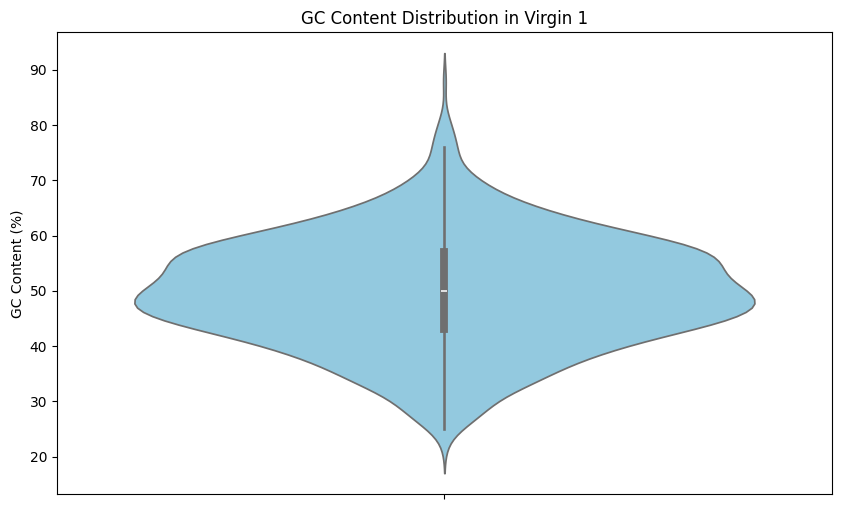

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=gc_contents_lumina_vir_1, color='skyblue')
plt.title('GC Content Distribution in Virgin 1')
plt.ylabel('GC Content (%)')
plt.show()

In [10]:

record_2 = SeqIO.parse(file_2, 'fastq')

gc_contents_virgin_2 = []


for sequence in record_2:
    if "G" in sequence.seq or "C" in sequence.seq:
        gc_content = (sequence.seq.count("G") + sequence.seq.count("C")) / len(sequence.seq) * 100
        gc_contents_virgin_2.append(gc_content)
print("GC Contents:", gc_contents_virgin_2)

GC Contents: [32.0, 46.0, 53.0, 70.0, 48.0, 53.0, 53.0, 50.0, 50.0, 40.0, 31.0, 69.0, 39.0, 46.0, 40.0, 40.0, 47.0, 43.0, 36.0, 49.0, 34.0, 49.0, 34.0, 51.0, 47.0, 61.0, 64.0, 46.0, 37.0, 36.0, 47.0, 59.0, 44.0, 47.0, 59.0, 45.0, 41.0, 48.0, 41.0, 33.0, 44.0, 52.0, 37.0, 56.00000000000001, 65.0, 56.99999999999999, 46.0, 49.0, 43.0, 35.0, 56.00000000000001, 62.0, 36.0, 61.0, 56.00000000000001, 56.99999999999999, 62.0, 50.0, 42.0, 70.0, 54.0, 39.0, 55.00000000000001, 50.0, 53.0, 21.0, 72.0, 21.0, 61.0, 64.0, 60.0, 35.0, 50.0, 38.0, 55.00000000000001, 34.0, 40.0, 42.0, 35.0, 40.0, 57.99999999999999, 65.0, 40.0, 48.0, 54.0, 55.00000000000001, 30.0, 57.99999999999999, 87.0, 69.0, 53.0, 50.0, 41.0, 44.0, 52.0, 47.0, 55.00000000000001, 49.0, 49.0, 51.0, 38.0, 40.0, 55.00000000000001, 44.0, 47.0, 49.0, 54.0, 44.0, 55.00000000000001, 71.0, 60.0, 27.0, 47.0, 81.0, 64.0, 44.0, 47.0, 53.0, 47.0, 45.0, 45.0, 32.0, 40.0, 54.0, 51.0, 52.0, 38.0, 43.0, 36.0, 60.0, 45.0, 60.0, 45.0, 47.0, 82.0, 56.9999

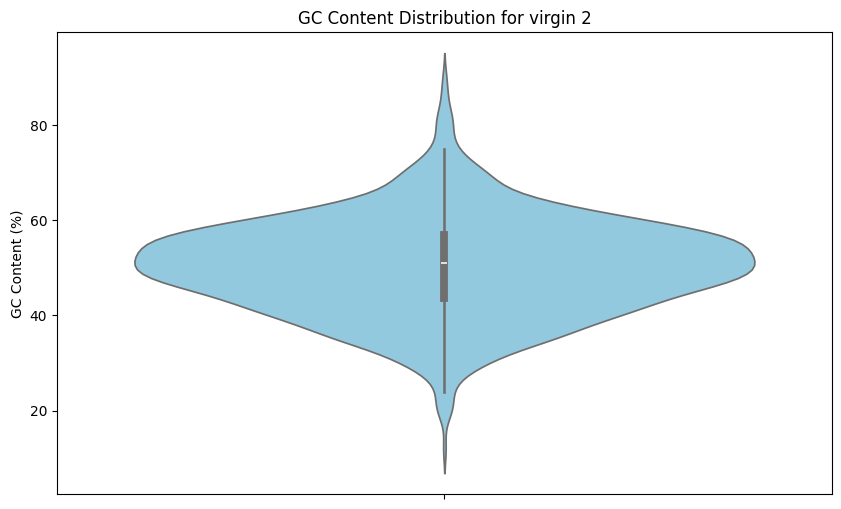

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=gc_contents_virgin_2, color='skyblue')
plt.title('GC Content Distribution for virgin 2')
plt.ylabel('GC Content (%)')
plt.show()

#Sequence Quality score using FastQC

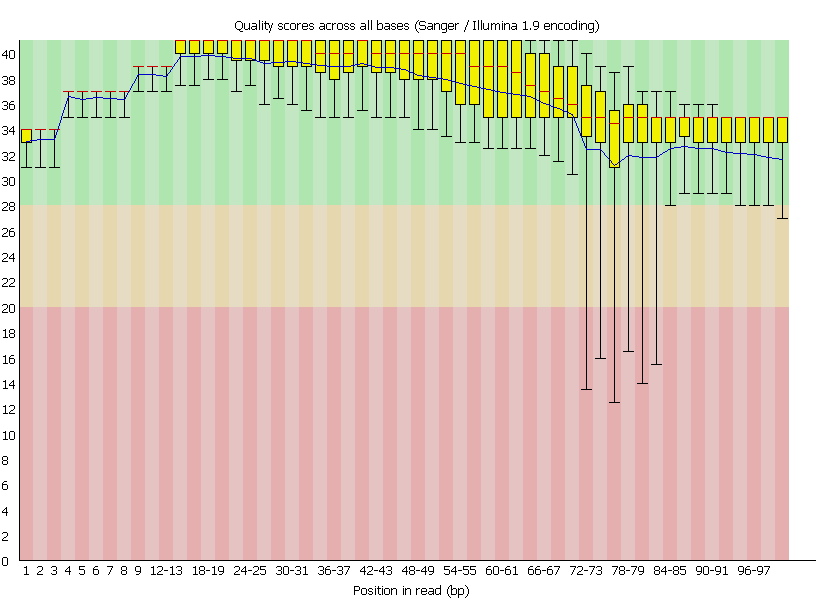

In [12]:
from IPython.display import Image
import os
current_dir = os.getcwd()

file__1 = 'file1.png'
image_path = os.path.join(current_dir, file__1)

Image(filename=image_path)



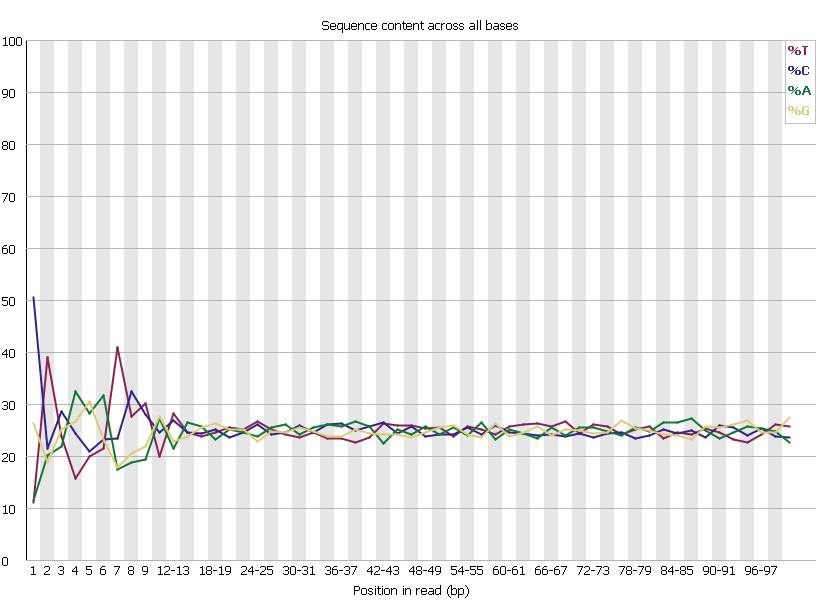

In [13]:
current_dir = os.getcwd()

file2 = 'd2.png'
image_path = os.path.join(current_dir, file2)

Image(filename=image_path)

Analysis In progress

In [14]:
!pip install cutadapt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.9/259.9 kB 12.1 MB/s eta 0:00:00


In [15]:
import subprocess

def trim_reads(input_file, output_file, quality_threshold=20, min_length=50, clip_length=10):
    # Build the cutadapt command
    cmd = [
        'cutadapt',
        f'-q {quality_threshold}',
        f'--minimum-length {min_length}',
        f'--output {output_file}',
        input_file
    ]


    subprocess.run(' '.join(cmd), shell=True)


input_file = 'SRR1552444.fastq'
output_file = 'trimmed_SRR1552444.fastq'

trim_reads(input_file, output_file)


In [16]:
# Install hisat2, samtools, and subread
!apt-get -qq install -y hisat2
!apt-get -qq install -y samtools
!apt-get -qq install -y subread





Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../0-libhtscodecs2_1.1.1-3_amd64.deb ...
Unpacking libhtscodecs2:amd64 (1.1.1-3) ...
Selecting previously unselected package libhts3:amd64.
Preparing to unpack .../1-libhts3_1.13+ds-2build1_amd64.deb ...
Unpacking libhts3:amd64 (1.13+ds-2build1) ...
Selecting previously unselected package bcftools.
Preparing to unpack .../2-bcftools_1.13-1_amd64.deb ...
Unpacking bcftools (1.13-1) ...
Selecting previously unselected package hisat2.
Preparing to unpack .../3-hisat2_2.2.1-3_amd64.deb ...
Unpacking hisat2 (2.2.1-3) ...
Selecting previously unselected package python3-hisat2.
Preparing to unpack .../4-python3-hisat2_2.2.1-3_all.deb ...
Unpacking python3-hisat2 (2.2.1-3) ...
Selecting previously unselected package samtools.
Preparing to unpack .../5-samtools_1.13-4_amd64.deb ...
Unpacking samtools (1.13-4) ...
Setting up libhtscodecs2:amd6

In [17]:
!wget https://ftp.ensembl.org/pub/release-108/fasta/mus_musculus/cdna/Mus_musculus.GRCm39.cdna.all.fa.gz


--2024-01-26 22:02:02--  https://ftp.ensembl.org/pub/release-108/fasta/mus_musculus/cdna/Mus_musculus.GRCm39.cdna.all.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51060789 (49M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.cdna.all.fa.gz’

Mus_musculus.GRCm39 100%[===================>]  48.70M   625KB/s    in 81s     

2024-01-26 22:03:23 (618 KB/s) - ‘Mus_musculus.GRCm39.cdna.all.fa.gz’ saved [51060789/51060789]



In [18]:
!gunzip Mus_musculus.GRCm39.cdna.all.fa.gz

In [19]:
!hisat2-build Mus_musculus.GRCm39.cdna.all.fa GRCm39_index

Settings:
  Output files: "GRCm39_index.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Mus_musculus.GRCm39.cdna.all.fa
Reading reference sizes
  Time reading reference sizes: 00:00:04
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:02
  Time to read SNPs and splice sites: 00:00:00
Using parameters --bmax 40375311 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 40375311 --dcv 1024
Constructing suff

In [20]:
!hisat2 -x GRCm39_index -U trimmed_SRR1552444.fastq -S aligned_reads.sam



992 reads; of these:
  992 (100.00%) were unpaired; of these:
    151 (15.22%) aligned 0 times
    254 (25.60%) aligned exactly 1 time
    587 (59.17%) aligned >1 times
84.78% overall alignment rate


In [21]:
!apt-get install bedtools
!bedtools genomecov -ibam aligned_reads.sorted.bam -bg > coverage.bedgraph

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (564 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 121906 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...
[E::hts_open_format_impl] Failed to open file aligned_reads.sorted.bam
Failed to open BAM file aligned_reads.sorted.bam


In [22]:
!pip install igv-jupyterlab



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.8 MB/s eta 0:00:00


In [23]:
from igv_jupyterlab import IGV


In [24]:
!samtools view -bS aligned_reads.sam > aligned_reads.bam


In [25]:
!samtools sort aligned_reads.bam -o aligned_reads.sorted.bam


In [26]:
!samtools sort aligned_reads.bam -o aligned_reads.sorted.bam


In [27]:
!samtools index aligned_reads.sorted.bam

#Read Feature count

> Indented block



In [30]:
!pip install htseq
!pip install pysam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 31.4 MB/s eta 0:00:00


In [31]:
import subprocess
import os


In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
os.chdir('/content')

In [41]:

cdna_file = '/content/Mus_musculus.GRCm39.cdna.all.fa'

# Run featureCounts using the cDNA FASTA file
command = f'featureCounts -a {cdna_file} -o feature_counts.txt -p -t exon -g gene_id -T 4 aligned_reads.sam'
subprocess.run(command, shell=True)

CompletedProcess(args='featureCounts -a /content/Mus_musculus.GRCm39.cdna.all.fa -o feature_counts.txt -p -t exon -g gene_id -T 4 aligned_reads.sam', returncode=255)

In [42]:
result = subprocess.run(command, shell=True, capture_output=True)
print(result.stdout.decode())
print(result.stderr.decode())



        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 SAM file                                       ||
||                                                                            ||
||                           aligned_reads.sam                                ||
||                                                                            ||
||             Output file : feature_counts.txt                 

# Using salmon because ealier technique does not work, it need the reference in .gtf

In [43]:
!pip install salmon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 9.7 MB/s eta 0:00:00
  Created wheel for dj-static: filename=dj_static-0.0.5-py3-none-any.whl size=2460 sha256=1b01690749e7dbd6a57b418c85967f40ecb4017bece362f1ed7fe284e10d4d38
  Stored in directory: /root/.cache/pip/wheels/67/e9/93/984cad09126ff74318fb6d2bb76483c2414b4b716b84a92e42
  Created wheel for djangorestframework: file

In [55]:
!!salmon index -t Mus_musculus.GRCm39.cdna.all.fa -i salmon_index


['Traceback (most recent call last):',
 '  File "/usr/local/bin/salmon", line 5, in <module>',
 '    from salmon.core.runner import main',
 '  File "/usr/local/lib/python3.10/dist-packages/salmon/core/runner.py", line 5, in <module>',
 '    from logan.runner import run_app, parse_args, configure_app as logan_configure',
 '  File "/usr/local/lib/python3.10/dist-packages/logan/runner.py", line 129',
 '    print "usage: %s [--config=/path/to/settings.py] [command] [options]" % runner_name',
 '    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^',
 "SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?"]

#Using Kallisto

In [60]:
!pip install kallisto

  Using cached kallisto-1.0.10-py3-none-any.whl (104 kB)


In [62]:
!kallisto index -t Mus_musculus.GRCm39.cdna.all.fa -i GRCm39_index


Usage: kallisto [OPTIONS] COMMAND1 [ARGS]... [COMMAND2 [ARGS]...]...
Try 'kallisto --help' for help.

Error: No such command 'index'.
